In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
warnings.filterwarnings("ignore")

# **Connected to drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Heart.csv", header=None)

In [5]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (1026, 1)


In [6]:
df.head()

,0
0,"age,sex,cp,trestbps,chol,fbs,restecg,thalach,e..."
1,"52,1,0,125,212,0,1,168,0,1,2,2,3,0"
2,"53,1,0,140,203,1,0,155,1,3.1,0,0,3,0"
3,"70,1,0,145,174,0,1,125,1,2.6,0,0,3,0"
4,"61,1,0,148,203,0,1,161,0,0,2,1,3,0"


In [7]:
df_split = df[0].str.split(",", expand=True)


df_split.columns = df_split.iloc[0]
df_split = df_split[1:]


df_split = df_split.reset_index(drop=True)
df_split = df_split.apply(pd.to_numeric, errors='ignore')

print(df_split.head())

0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

0  ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
print(df_split.shape)
df_split.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})




(1025, 14)


0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.000000,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.400000,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.800000,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.800000,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.200000,1,2,2,0


In [9]:
dict = {}
for i in list(df_split.columns):
    dict[i] = df_split[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# **Seperate the column in category and continuous**

In [10]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thal']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['output']


In [11]:
df_split[con_cols].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [12]:
df_split.isnull().sum()

,0
0,
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


# ***Exploaratory Data Analysis***

# 1.   Univariate Analysis





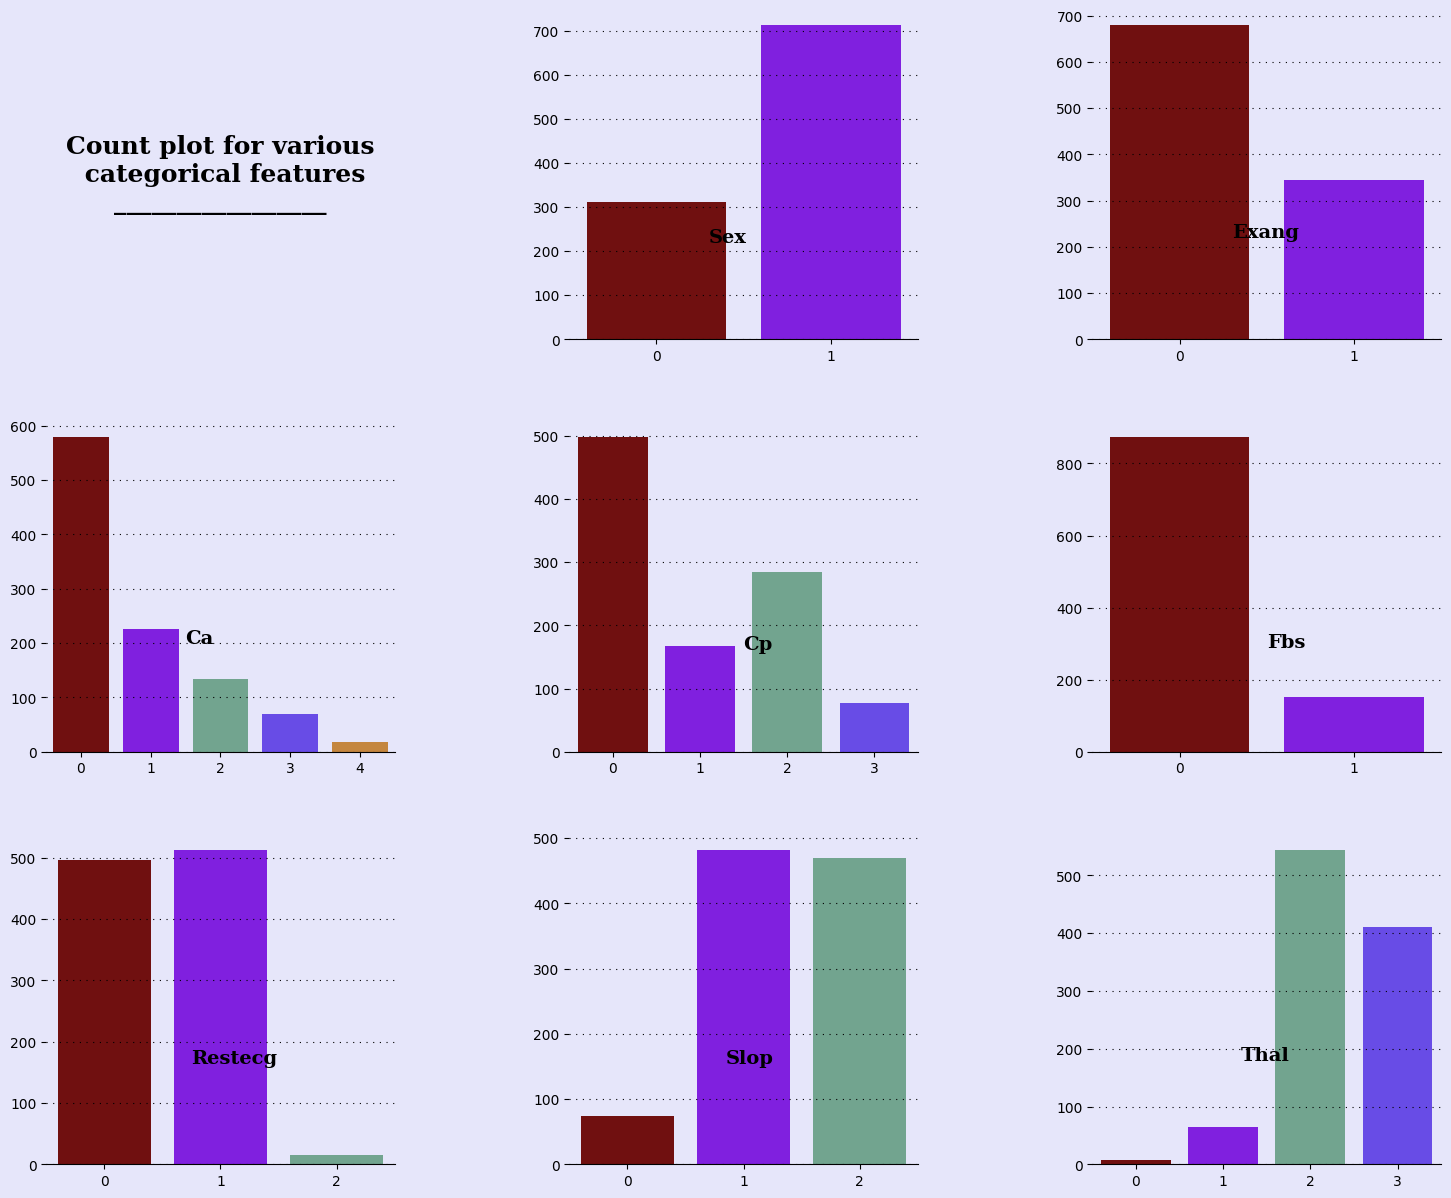

In [13]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df_split,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exang count
ax2.text(0.3, 220, 'Exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df_split,x='exang',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Ca', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df_split,x='ca',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df_split,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df_split,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df_split,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slop', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df_split,x='slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thal', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df_split,x='thal',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

# **Box Plot**

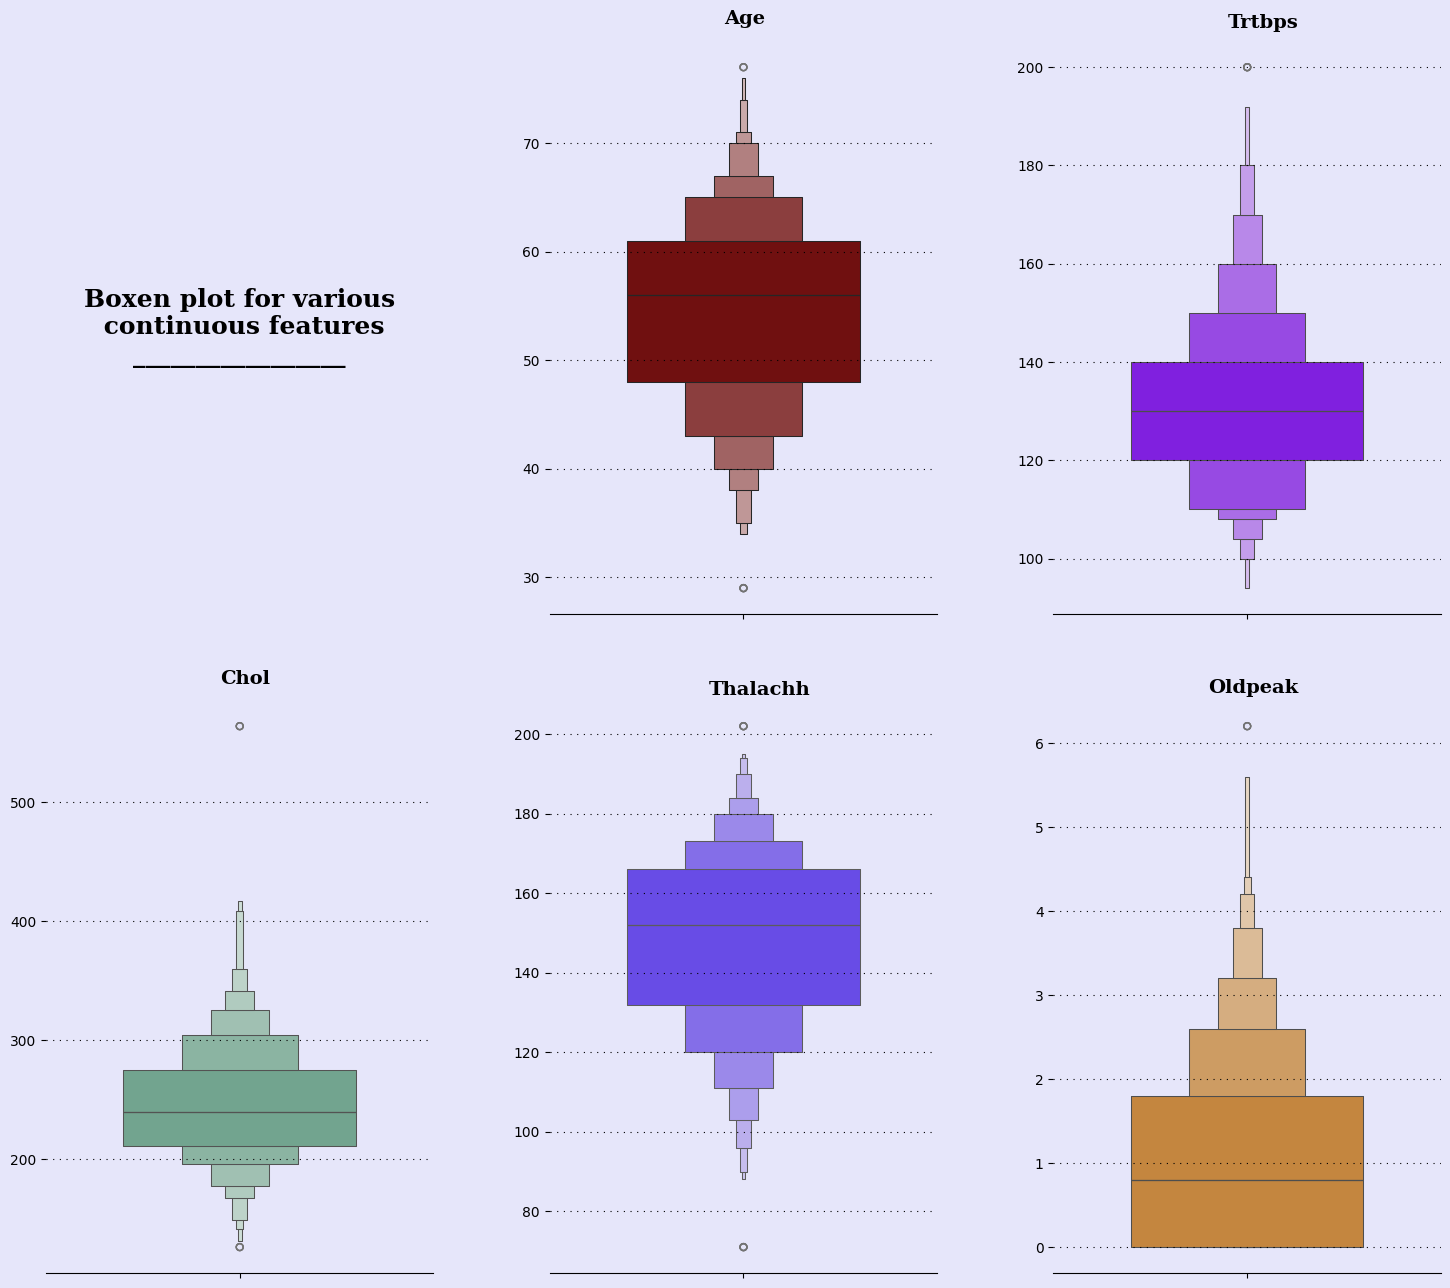

In [14]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df_split['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df_split['trestbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df_split['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df_split['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df_split['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

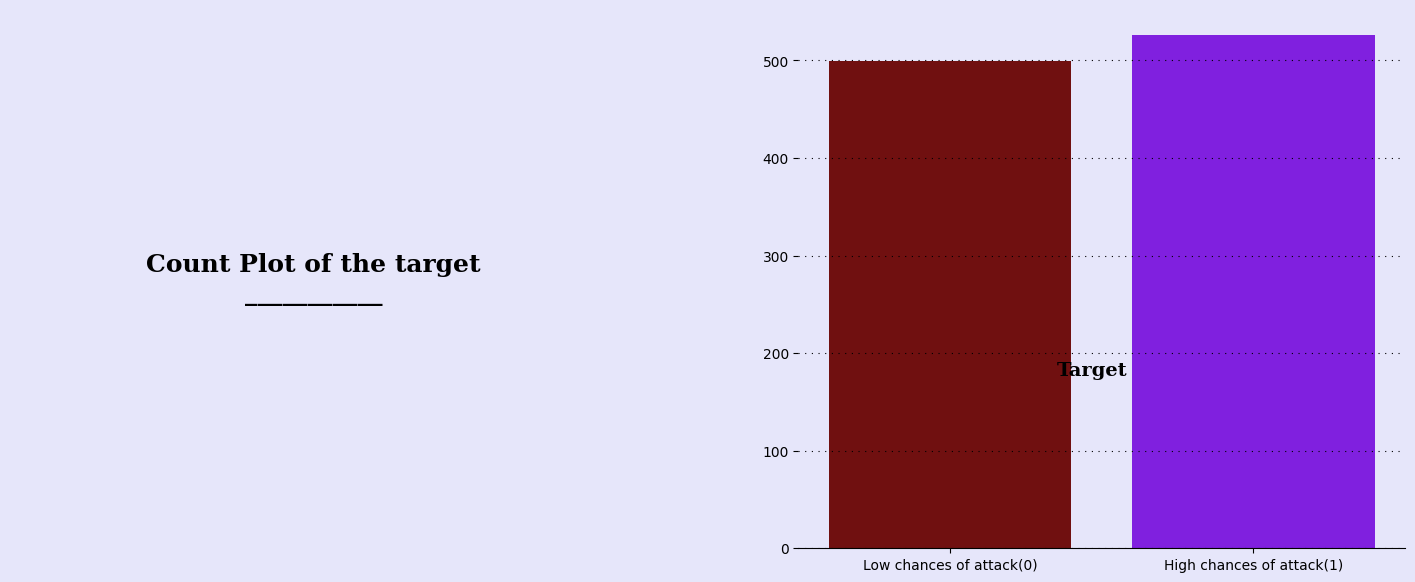

In [15]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count Plot of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Target",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df_split, x = 'target',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# **Correlation Matrix of continuous features**




In [16]:
df_corr = df_split[con_cols].corr().transpose()
df_corr

,age,trestbps,chol,thalach,oldpeak
0,,,,,
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


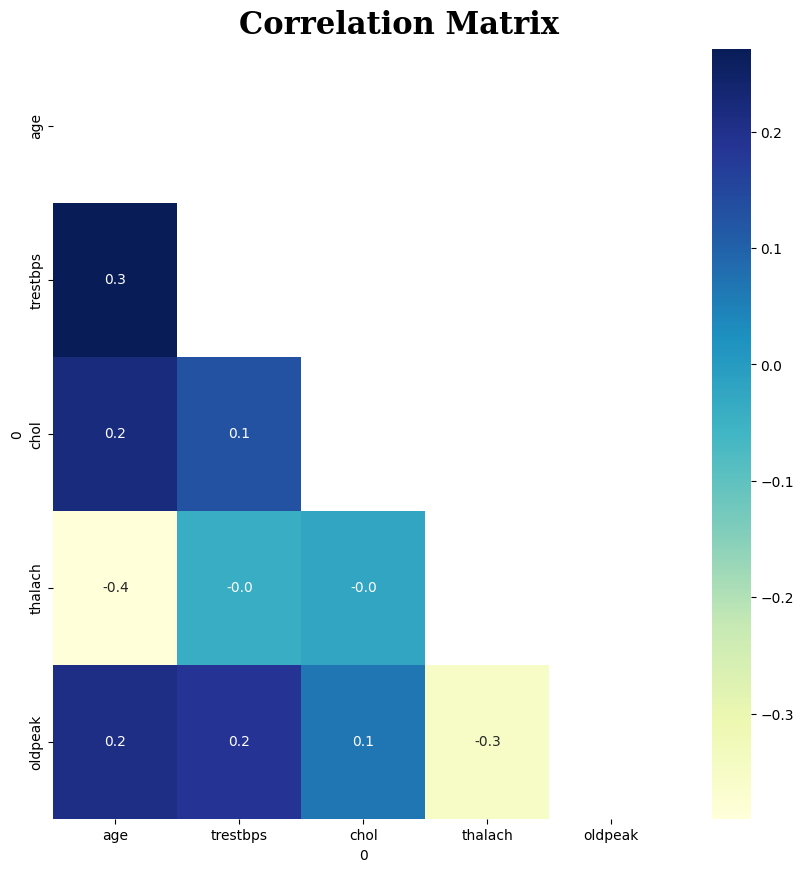

In [17]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df_split[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()



# **Distribution of continuous features according to target variable**

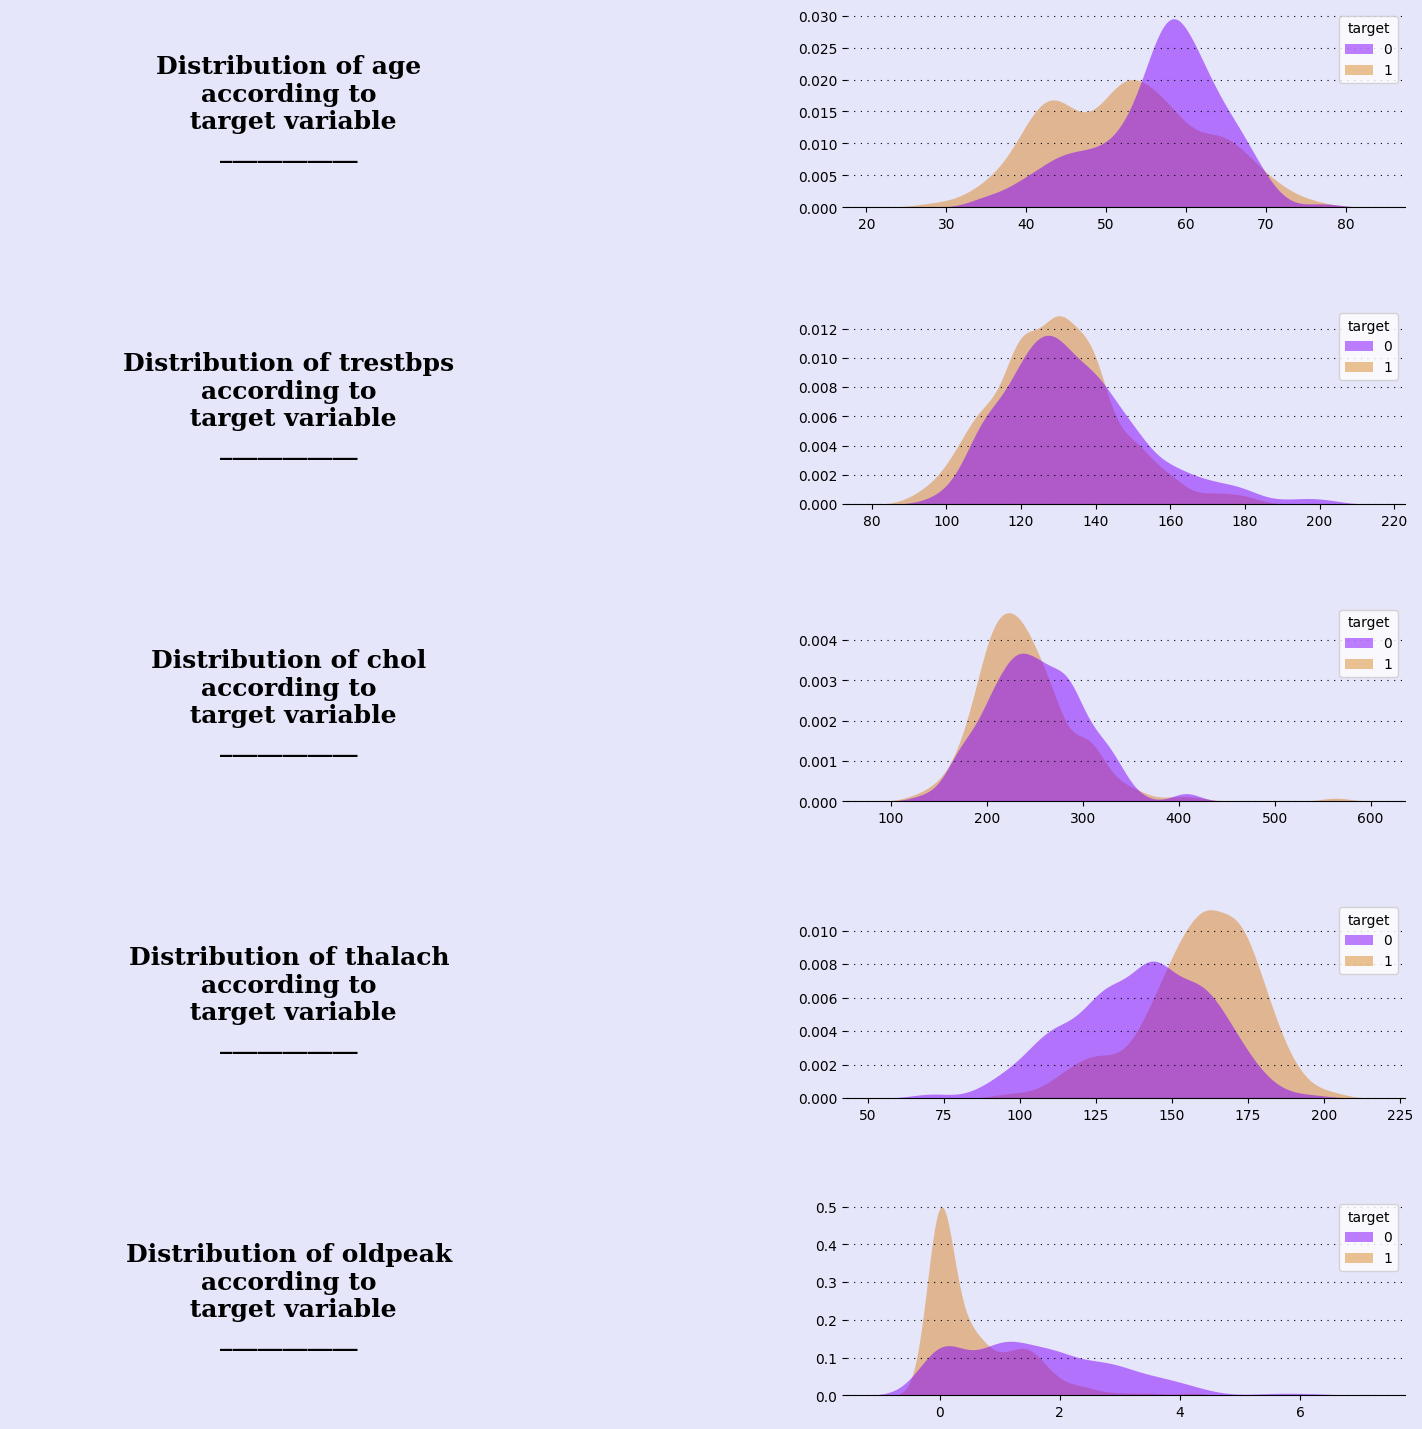

In [18]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_split, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trestbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_split, x='trestbps',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_split, x='chol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalach\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_split, x='thalach',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color="#000000")
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df_split, x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

    plt.savefig("continuous_features_distribution.pdf", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())


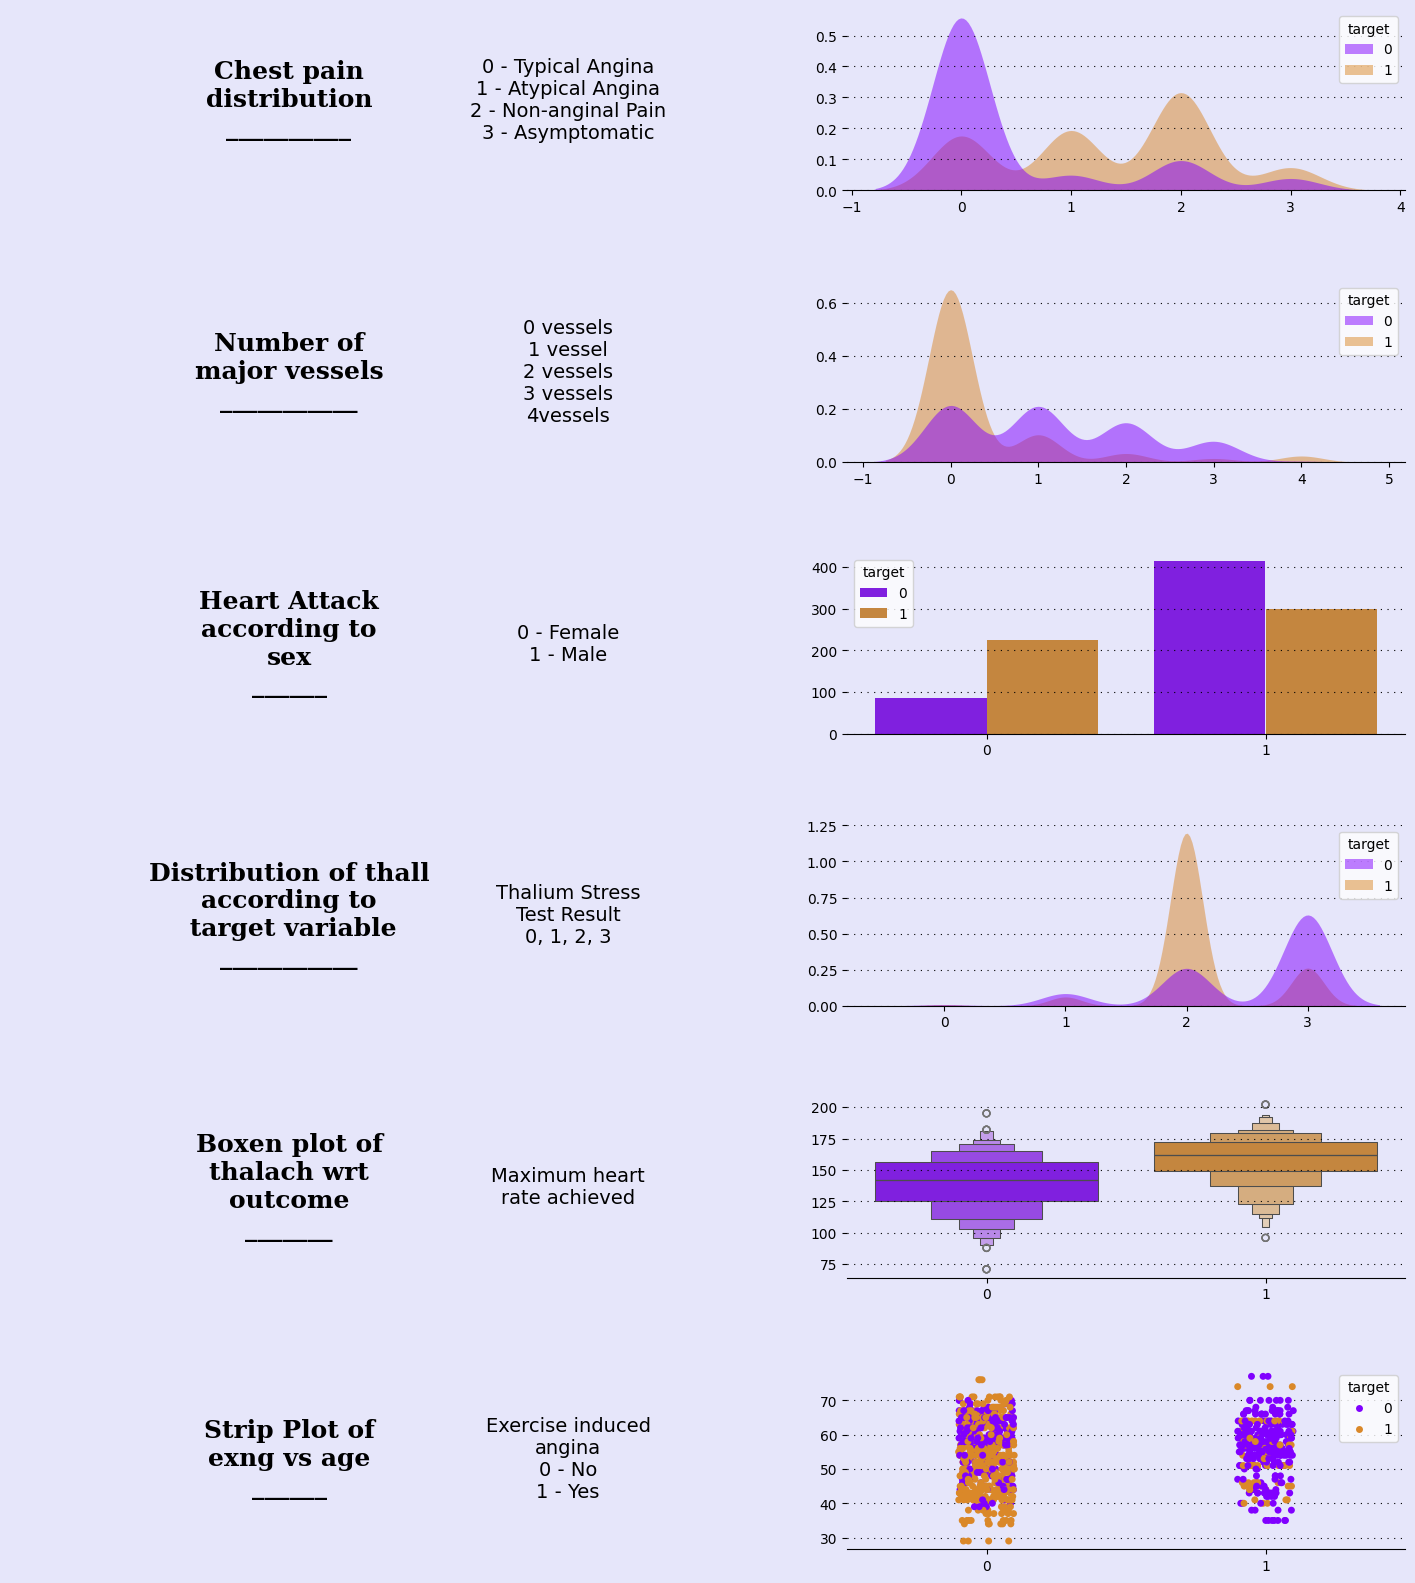

In [19]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_split, x='cp',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_split, x='ca',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df_split,x='sex',palette=["#8000ff","#da8829"], hue='target')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_split, x='thal',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalach wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df_split,x='target',y='thalach',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df_split,x='exang',y='age',hue='target',palette=["#8000ff","#da8829"])
ax11.set_xlabel("")
ax11.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

# **Scaling and Encoding features**

In [20]:

df1 = df_split.copy()


cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)


X = df1.drop(['target'],axis=1)
y = df1[['target']]

# instantiating the scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trestbps,chol,thalach,oldpeak,sex_1,exang_1,ca_1,ca_2,ca_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.307692,-0.25,-0.437500,0.470588,0.111111,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,-0.230769,0.50,-0.578125,0.088235,1.277778,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1.076923,0.75,-1.031250,-0.794118,1.000000,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.384615,0.90,-0.578125,0.264706,-0.444444,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,0.461538,0.40,0.843750,-1.352941,0.611111,False,False,False,False,True,...,False,False,True,True,False,True,False,False,True,False


# **Test and Train**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.7, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (307, 22)
The shape of X_test is        (718, 22)
The shape of y_train is       (307, 1)
The shape of y_test is        (718, 1)


In [22]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The data (X_train, X_test, y_train, y_test) has already been preprocessed
# and is ready for model training.
# The following preprocessing steps are redundant and causing the error.
# Removing them:

# define preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), con_cols),
#         ('cat', OneHotEncoder(), cat_cols)])

# fit and transform training data
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

## Model Training

# CatBoost Model

0:	test: 0.7707143	best: 0.7707143 (0)	total: 86.8ms	remaining: 1m 9s
100:	test: 0.9954286	best: 0.9954286 (99)	total: 2.21s	remaining: 15.3s
200:	test: 0.9996190	best: 0.9996190 (168)	total: 4.28s	remaining: 12.8s
300:	test: 1.0000000	best: 1.0000000 (213)	total: 5.52s	remaining: 9.15s
400:	test: 1.0000000	best: 1.0000000 (213)	total: 6.56s	remaining: 6.53s
500:	test: 1.0000000	best: 1.0000000 (213)	total: 7.79s	remaining: 4.65s
600:	test: 1.0000000	best: 1.0000000 (213)	total: 8.85s	remaining: 2.93s
700:	test: 1.0000000	best: 1.0000000 (213)	total: 9.9s	remaining: 1.4s
799:	test: 1.0000000	best: 1.0000000 (213)	total: 10.7s	remaining: 0us

bestTest = 1
bestIteration = 213

Shrink model to first 214 iterations.
 CatBoost Performance
Training Accuracy: 0.998780487804878
Testing Accuracy: 0.9902439024390244
AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  2 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       10

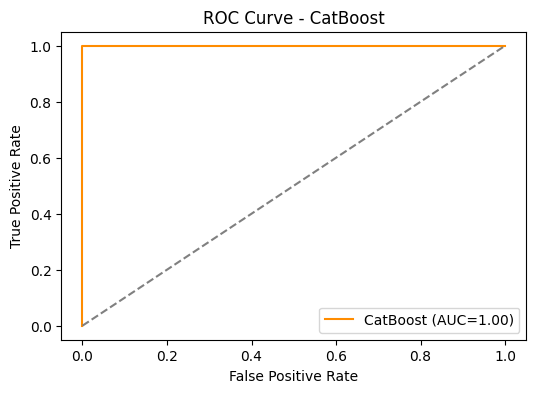

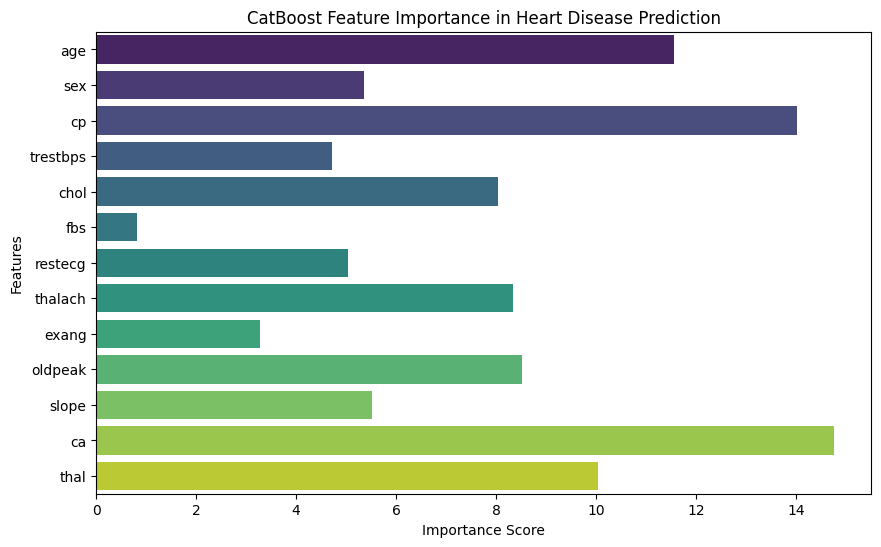

In [25]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier

cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

X = df_split.drop(['target'], axis=1)
y = df_split['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pools for CatBoost
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)
test_pool  = Pool(data=X_test,  label=y_test,  cat_features=cat_cols)


# Train CatBoost Model

cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

cat_model.fit(train_pool, eval_set=test_pool, plot=False)



y_pred = cat_model.predict(X_test)
y_prob = cat_model.predict_proba(X_test)[:, 1]

acc_train = accuracy_score(y_train, cat_model.predict(X_train))
acc_test  = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


print(" CatBoost Performance")
print("Training Accuracy:", acc_train)
print("Testing Accuracy:", acc_test)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"CatBoost (AUC={auc:.2f})", color="darkorange")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.show()


#  Feature Importance

feature_importances = cat_model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title("CatBoost Feature Importance in Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Support Vector Machine

 SVM Performance
Accuracy: 0.8878048780487805
AUC: 0.9629523809523809
Confusion Matrix:
 [[85 15]
 [ 8 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.87      0.92      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



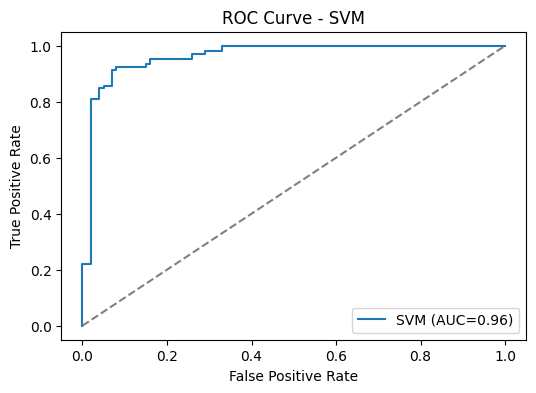

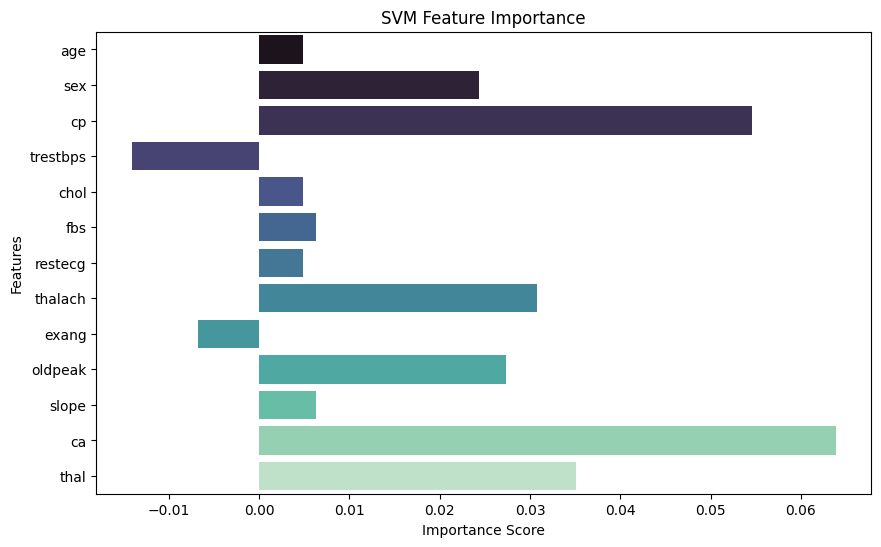

In [26]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]


X = df_split.drop(['target'], axis=1)
y = df_split['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale continuous features
scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])


 # Train SVM Model

svm_model = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)


# Evaluation

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(" SVM Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"SVM (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


# Feature Importance

from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="mako")
plt.title("SVM Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Decision Tree


 Decision Tree Performance
Accuracy: 0.8731707317073171
AUC: 0.9326190476190477
Confusion Matrix:
 [[85 15]
 [11 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



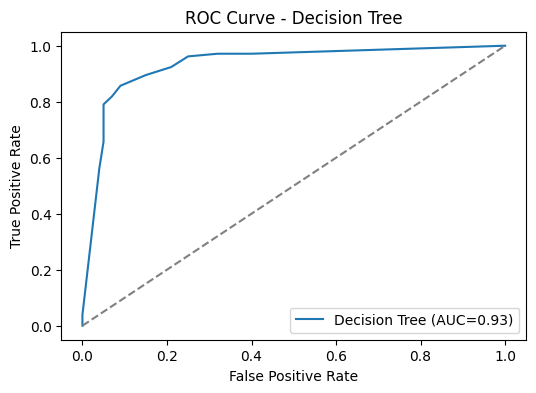

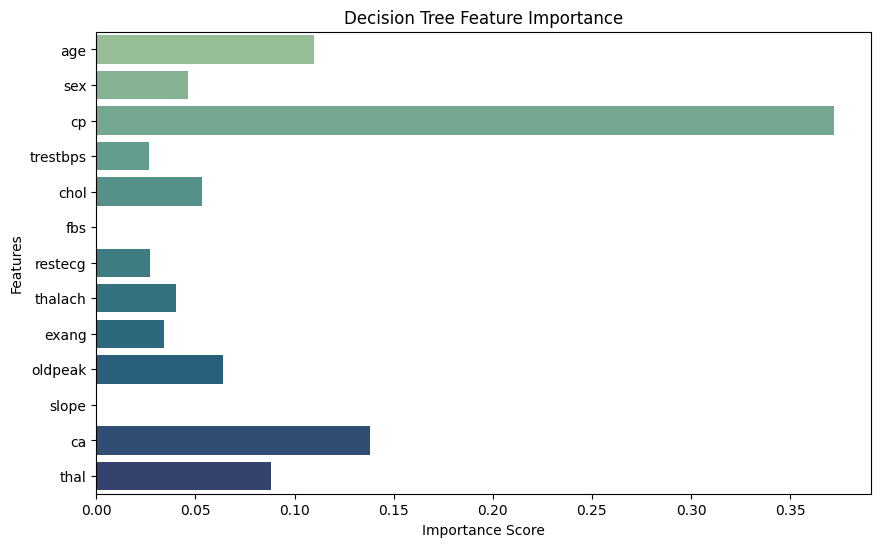

In [27]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

X = df_split.drop(['target'], axis=1)
y = df_split['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])


#  Train Decision Tree
#
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


# Evaluation

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(" Decision Tree Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


#  Feature Importance

importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="crest")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Random Forest

Random Forest Performance
Accuracy: 0.9902439024390244
AUC: 0.9996190476190477
Confusion Matrix:
 [[ 98   2]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



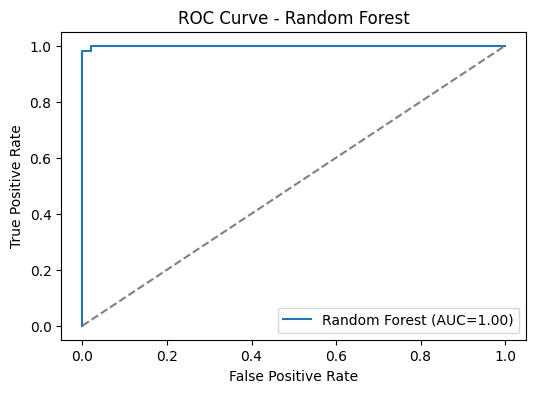

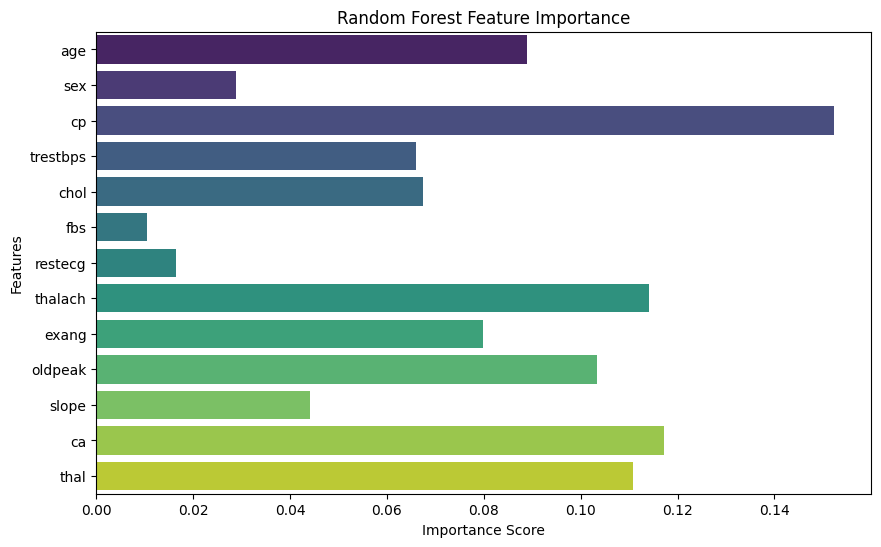

In [28]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

X = df_split.drop(['target'], axis=1)
y = df_split['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])


#Train Random Forest

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


#  Evaluation

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Random Forest Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


#  Feature Importance

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Confusion Matrix

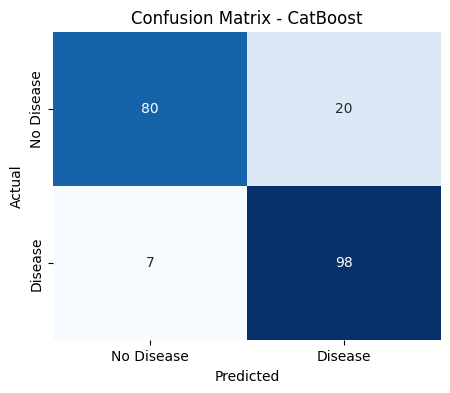

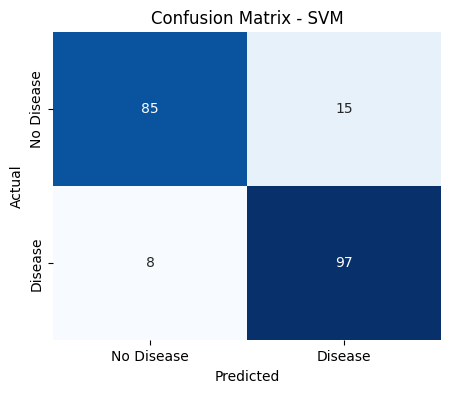

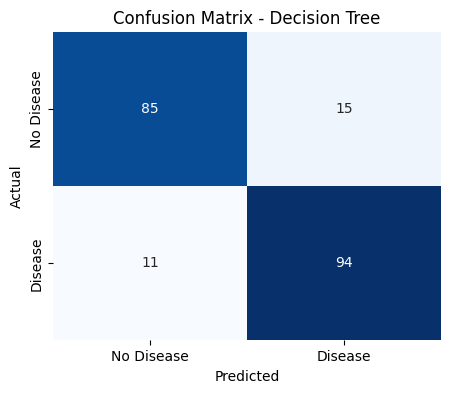

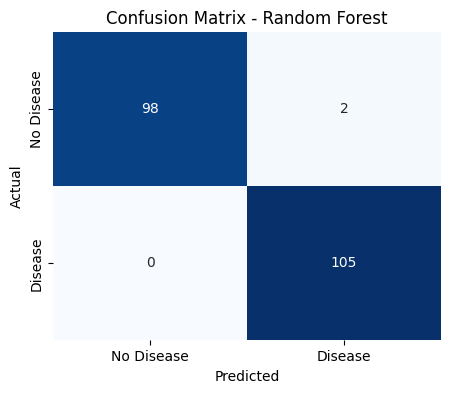

In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



#  CatBoost Confusion Matrix

y_pred_cat = cat_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")


#  SVM Confusion Matrix

y_pred_svm = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

#  Decision Tree Confusion Matrix

y_pred_dt = dt_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")


# Random Forest Confusion Matrix

y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

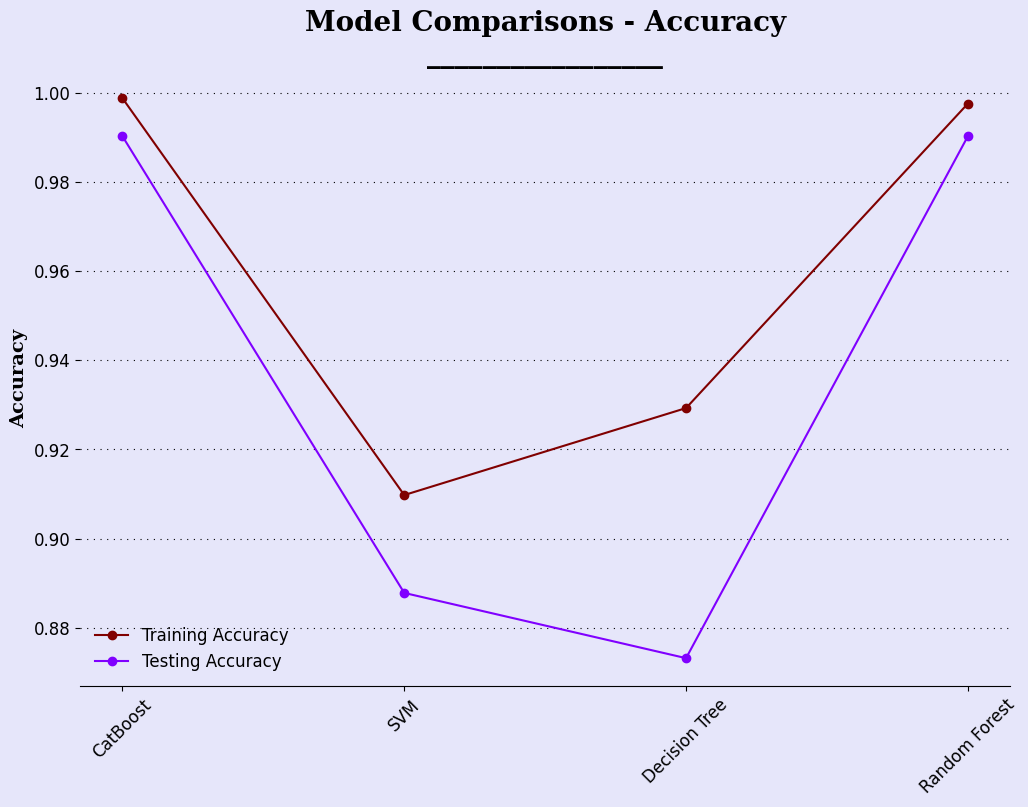

In [32]:

#  Train CatBoost Model

cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)
test_pool  = Pool(data=X_test,  label=y_test,  cat_features=cat_cols)

cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

cat_model.fit(train_pool, eval_set=test_pool, plot=False)


#  Predictions & Accuracy

# CatBoost
y_train_pred_cat = cat_model.predict(X_train)
y_test_pred_cat  = cat_model.predict(X_test)
acc_train_cat = accuracy_score(y_train, y_train_pred_cat)
acc_test_cat  = accuracy_score(y_test, y_test_pred_cat)

#  SVM
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm  = svm_model.predict(X_test)
acc_train_svm = accuracy_score(y_train, y_train_pred_svm)
acc_test_svm  = accuracy_score(y_test, y_test_pred_svm)

# Decision Tree
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt  = dt_model.predict(X_test)
acc_train_dt = accuracy_score(y_train, y_train_pred_dt)
acc_test_dt  = accuracy_score(y_test, y_test_pred_dt)

#  Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf  = rf_model.predict(X_test)
acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
acc_test_rf  = accuracy_score(y_test, y_test_pred_rf)



model_names   = ["CatBoost", "SVM", "Decision Tree", "Random Forest"]
train_results = [acc_train_cat, acc_train_svm, acc_train_dt, acc_train_rf]
test_results  = [acc_test_cat, acc_test_svm, acc_test_dt, acc_test_rf]


# Customised Plot

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(1,1,1)


background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)


ax0.text(0.5, 1.05, "Model Comparisons - Accuracy\n_________________",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000",
         transform=ax0.transAxes)


ax0.plot(model_names, train_results, 'o-', label="Training Accuracy", color=color_palette[0])
ax0.plot(model_names, test_results, 'o-', label="Testing Accuracy", color=color_palette[1])


for spine in ["top","right","left"]:
    ax0.spines[spine].set_visible(False)

ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax0.tick_params(axis='x', rotation=45, labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# Labels
ax0.set_ylabel("Accuracy", fontsize=14, fontweight='bold', fontfamily='serif')
ax0.set_xlabel("", fontsize=14, fontfamily='serif')

# Legend
ax0.legend(frameon=False, fontsize=12)

plt.show()

In [33]:
print("CatBoost - Train:", acc_train_cat, " Test:", acc_test_cat)
print("SVM - Train:", acc_train_svm, " Test:", acc_test_svm)
print("Decision Tree - Train:", acc_train_dt, " Test:", acc_test_dt)
print("Random Forest - Train:", acc_train_rf, " Test:", acc_test_rf)


CatBoost - Train: 0.998780487804878  Test: 0.9902439024390244
SVM - Train: 0.9097560975609756  Test: 0.8878048780487805
Decision Tree - Train: 0.9292682926829269  Test: 0.8731707317073171
Random Forest - Train: 0.9975609756097561  Test: 0.9902439024390244


# HYPER PARAMETER TUNING : Decision Tree

In [34]:


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt = DecisionTreeClassifier(random_state=42)


grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

grid_dt.fit(X_train, y_train)

print("Decision Tree Best Parameters:", grid_dt.best_params_)
print("Decision Tree Best CV Score:", grid_dt.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Best CV Score: 0.9890243902439024


 Decision Tree Performance
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



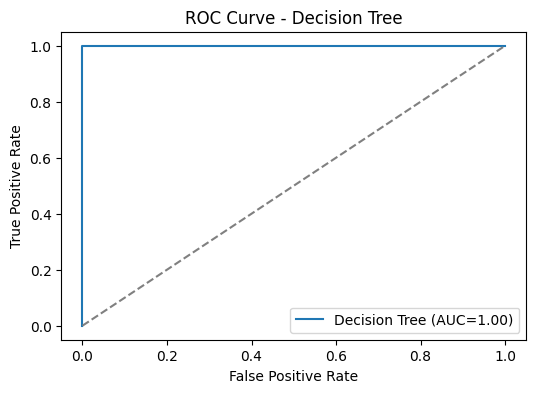

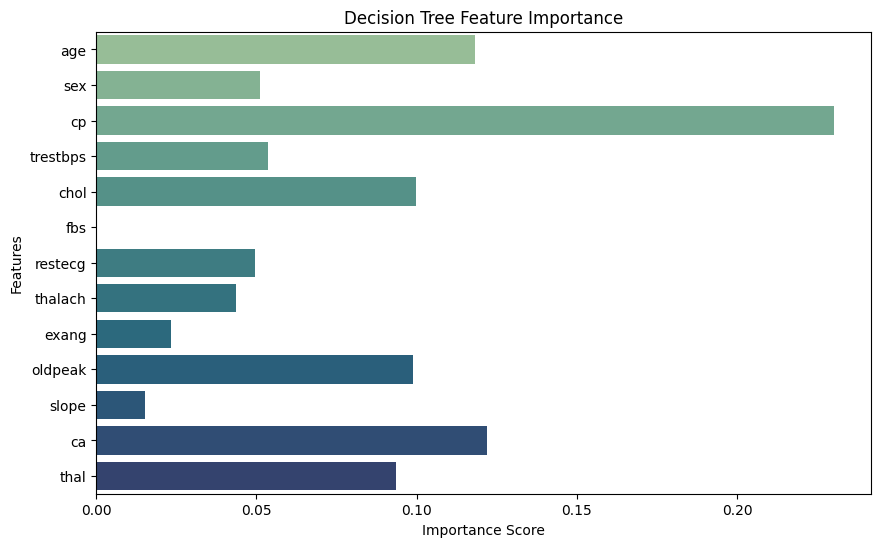

In [36]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

X = df_split.drop(['target'], axis=1)
y = df_split['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])


#  Train Decision Tree

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=42,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best'
)

dt_model.fit(X_train, y_train)


# Evaluation

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(" Decision Tree Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


# Feature Importance

importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="crest")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#Hyper Parameter tuning for SVM

In [35]:

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize model
svm = SVC(probability=True, random_state=42)


grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid_svm,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1)

grid_svm.fit(X_train, y_train)

print("SVM Best Parameters:", grid_svm.best_params_)
print("SVM Best CV Score:", grid_svm.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
SVM Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
SVM Best CV Score: 0.9829268292682928


 SVM Performance
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



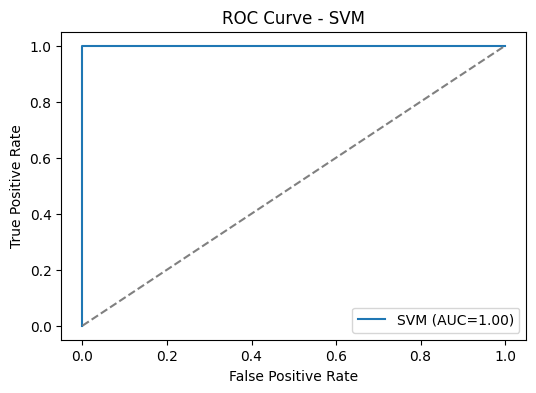

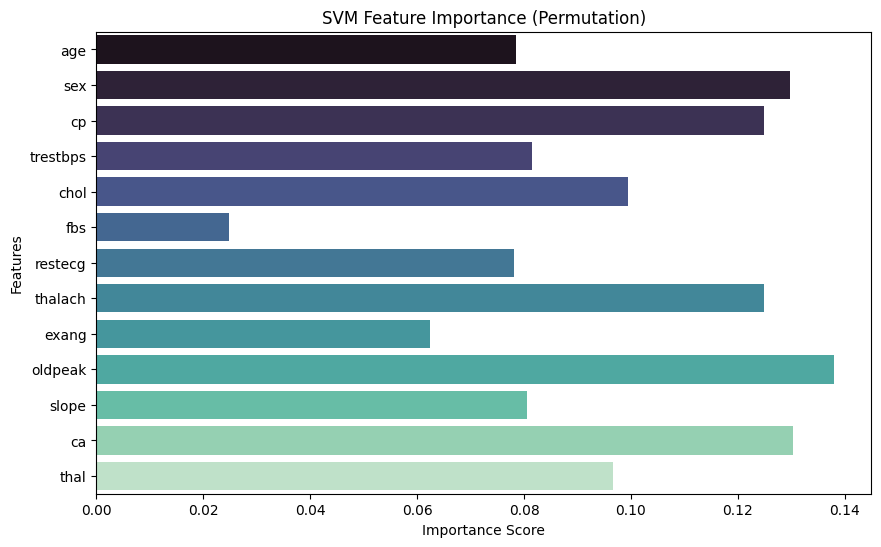

In [37]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]


X = df_split.drop(['target'], axis=1)
y = df_split['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])


# Train SVM Model

svm_model = SVC(
    kernel='poly',
    C=0.1,
    gamma=1.0,
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)


#  Evaluation

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(" SVM Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"SVM (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


# Feature Importance

from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="mako")
plt.title("SVM Feature Importance (Permutation)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()